In [10]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings 
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv('Walmart.csv')
df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [12]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [13]:
df.dropna(inplace=True)

# Weekly_Sales VS Unemployment

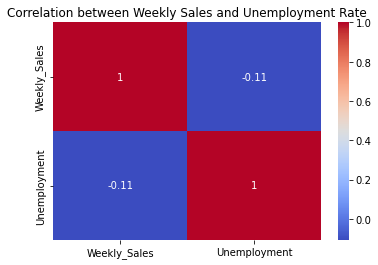

In [14]:
corr = df[['Weekly_Sales' , 'Unemployment']].corr()

# Plotting heatmap of correlation matrix
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Correlation between Weekly Sales and Unemployment Rate')
plt.show()

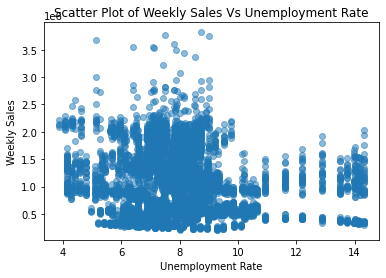

In [15]:
# Scatter Plot 
plt.scatter(df['Unemployment'] , df['Weekly_Sales'],alpha=0.5)
plt.title('Scatter Plot of Weekly Sales Vs Unemployment Rate')
plt.xlabel('Unemployment Rate')
plt.ylabel('Weekly Sales')
plt.show()

In [16]:
# Group the data by store
store_groups = df.groupby('Store')

# Loop through each store and calculate the correlation coefficient
for store, group in store_groups:
    corr = group['Weekly_Sales'].corr(group['Unemployment'])
    print("Store", store, "Correlation Coefficient between Weekly Sales and Unemployment Rate: ", corr)


Store 1 Correlation Coefficient between Weekly Sales and Unemployment Rate:  -0.09795539472957951
Store 2 Correlation Coefficient between Weekly Sales and Unemployment Rate:  0.06632485967770844
Store 3 Correlation Coefficient between Weekly Sales and Unemployment Rate:  -0.23041301348635257
Store 4 Correlation Coefficient between Weekly Sales and Unemployment Rate:  -0.33701519564455884
Store 5 Correlation Coefficient between Weekly Sales and Unemployment Rate:  -0.20704271031605842
Store 6 Correlation Coefficient between Weekly Sales and Unemployment Rate:  0.044250821015624074
Store 7 Correlation Coefficient between Weekly Sales and Unemployment Rate:  -0.16538168270129613
Store 8 Correlation Coefficient between Weekly Sales and Unemployment Rate:  -0.0525796461971268
Store 9 Correlation Coefficient between Weekly Sales and Unemployment Rate:  -0.191534363702284
Store 10 Correlation Coefficient between Weekly Sales and Unemployment Rate:  0.1319076220774609
Store 11 Correlation Coef

# Weekly Sale over Time 

In [17]:
df_sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()

In [18]:
df_sales['Date'] = pd.to_datetime(df_sales['Date'])

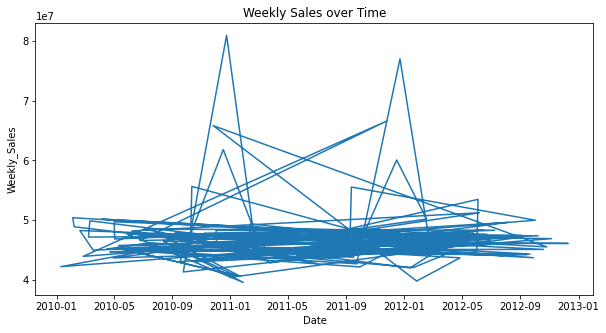

In [19]:
plt.figure(figsize=(10,5))
plt.plot(df_sales['Date'],df_sales["Weekly_Sales"])
plt.title('Weekly Sales over Time')
plt.xlabel('Date')
plt.ylabel('Weekly_Sales')
plt.show()

# Weekly sales and Tempertures

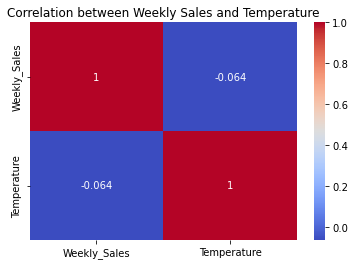

In [20]:
corr = df[['Weekly_Sales' , 'Temperature']].corr()

# Plotting heatmap of correlation matrix
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Correlation between Weekly Sales and Temperature')
plt.show()

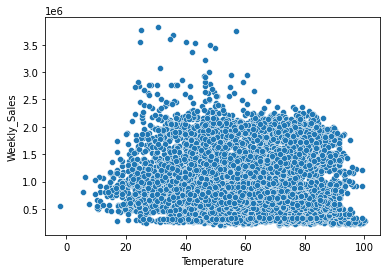

In [21]:
sns.scatterplot(data=df, x='Temperature' , y='Weekly_Sales')
plt.show()

In [22]:
# Calculate correlation coefficient between Temperature and Weekly Sales
corr = df["Temperature"].corr(df["Weekly_Sales"])
print("Correlation coefficient:", corr)

Correlation coefficient: -0.06381001317946958


# Weekly_Sales and CPI

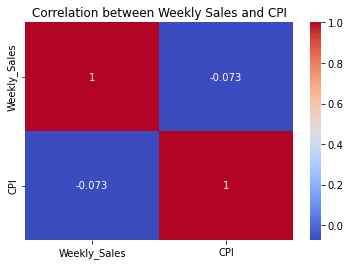

In [23]:
corr = df[['Weekly_Sales' , 'CPI']].corr()

# Plotting heatmap of correlation matrix
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Correlation between Weekly Sales and CPI')
plt.show()

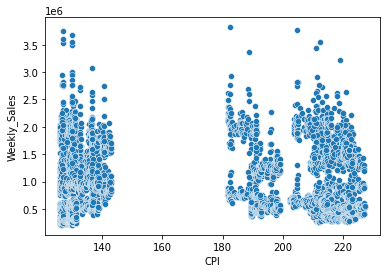

In [24]:
# Scatter plot of CPI vs Weekly Sales
sns.scatterplot(data=df, x="CPI", y="Weekly_Sales")
plt.show()

In [25]:
# Calculate correlation coefficient between CPI and Weekly Sales
corr = df["CPI"].corr(df["Weekly_Sales"])
print("Correlation coefficient:", corr)

Correlation coefficient: -0.07263416204017625


# Top Vs Wrost Performing Store

In [26]:
total_sales_by_store = df.groupby('Store')['Weekly_Sales'].sum().reset_index()
total_sales_by_store = total_sales_by_store.sort_values('Weekly_Sales',ascending=False)

print('Top Performing Store:')
print(total_sales_by_store.head(10))

print('\nWorst Performing Store:')
print(total_sales_by_store.tail(1))

Top Performing Store:
    Store  Weekly_Sales
19     20  3.013978e+08
3       4  2.995440e+08
13     14  2.889999e+08
12     13  2.865177e+08
1       2  2.753824e+08
9      10  2.716177e+08
26     27  2.538559e+08
5       6  2.237561e+08
0       1  2.224028e+08
38     39  2.074455e+08

Worst Performing Store:
    Store  Weekly_Sales
32     33   37160221.96


# Forecast for next 12 weeks for 45 Stores

In [27]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [ ]:
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 52)

# Initialize a dictionary to store the forecasts and MSEs for each store
forecasts_by_store = {}
mse_by_store = {}

# Loop over all the stores
for store_num in df['Store'].unique():
    # Filter the data for one store
    store_df = df[df['Store'] == store_num][['Date', 'Weekly_Sales']]
    store_df = store_df.set_index('Date')
    
    # Fit the SARIMA model to the data
    model = SARIMAX(store_df, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit()
    
    # Make a forecast for the next 12 weeks
    forecast = model_fit.forecast(steps=12)
    
    # Calculate the mean squared error of the forecast
    mse = mean_squared_error(store_df[-12:], forecast)
    
    # Store the forecast and MSE for this store
    forecasts_by_store[store_num] = forecast
    mse_by_store[store_num] = mse

# Print the forecasts and MSEs for all stores
for store_num in df['Store'].unique():
    print('Store {}:'.format(store_num))
    print('Forecast:\n {}'.format(forecasts_by_store[store_num]))
    print('MSE: {:.2f}'.format(mse_by_store[store_num]))
   